# Introduction

과학, 산업, 엔지니어링, 비지니스 등등 대부분의 분야에서 linear programming만으로도 많은 문제들을 해결을 할 수 있습니다.<br>
하지만 모든 문제가 linear하지 않습니다. Nonlinearities가 존재하는 문제에서는 LP은 first-order approximation정도만 할 수 있습니다.

> <span style="color:#999999">First-order approximation이라는 뜻은 order of approximation 단어와 연관성이 있습니다.<br>
> 간단하게 말하면 정확도를 뜻한다고 보면 됩니다.<br>
> Zeroth-order, first-order, second-order 등등 등급이 높아질수록 정확도(precision)도 높아진다는 뜻으로 해석을 하면 됩니다.<br>
> 즉 LP가 first-order approximation이라는 뜻은 어느정도는 맞추나 정확도가 현저히 떨어진다는 뜻으로 보면 됩니다.</span>

Quadratic Programming은 Nonlinearities 를 objective function에 반영시킬 수 있습니다.<br>
LP와 동일하게 quadratic **objective function**을 minimize 또는 maximize시킬수 있으며, 한정된 갯수의 **decision variables**을 갖고 있으며, 제약사항들을 갖을 수 있습니다.

# Mathematical Formula

## Constrained Quadratic Programming

수학적인 표현으로 quadratic programming problem은 다음과 같이 정의 될 수 있습니다.

$$ \begin{align} 
\min f(x) &= \sum^n_{j=1} c_j x_j + \frac{1}{2} \sum^n_{k=1} \sum^n_{j=1} h_{kj} x_k x_j &[1] \\
&= \mathbf{c}^T \mathbf{x} + \frac{1}{2} \mathbf{x}^T \mathbf{H} \mathbf{x} &[2] \\
\end{align} $$

이때 다음의 조건을 따릅니다.

$$  \begin{align} \mathbf{A} \mathbf{x} &= \mathbf{a} \\ 
\mathbf{B} \mathbf{x} &\le \mathbf{b} \\
\mathbf{x} &\ge 0 
\end{align} $$

* $ \mathbf{x} = (x_1, x_2, ..., x_n)^T $ 즉 finite number of decision variables
* $ \mathbf{c} = (c_1, c_2, ..., c_n)^T $
* $ \mathbf{b} = (b_1, b_2, ..., b_n)^T $
* $ \frac{1}{2} $ : f함수를 first 그리고 second derivative 를 구할때 편하기 때문에 포함되어 있다.
* $ \mathbf{H} $ : n x n 형태의 symmetric Hessian 매트릭스
* $ \mathbf{A} $ : m x n 형태의 매트릭스
* $ \mathbf{B} $ : m x n 형태의 매트릭스
* $ \mathbf{D} $ : n x n 형태의 upper-triangular 매트릭스이며 H로 부터 만들어진다


# Example 1

$$ z = x_1 - 2x_2 + 4x_3 + x^2_1 + 2x^2_2 + 3x^2_3 + x_1 x_3 $$ 

이때 다음의 조건을 따릅니다.

$$ \begin{align} 
0 \le x_1 \le 5  \\
1 \le x_2 \le 5 \\
0 \le x_3 \le 5
\end{align} $$

In [11]:
%pylab inline
import numpy as np
from cvxopt import matrix, solvers

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['matrix', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


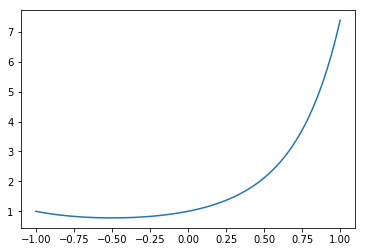

In [18]:
x = np.linspace(-1, 1, 1000)


def f(x):
    return np.exp(x + x**2)

plot(x, f(x))

In [2]:
a = np.array([[1, 2], [3, 0]])
b = np.array([[1], [5]])
b.T * a

array([[ 1, 10],
       [ 3,  0]])

In [3]:
H = 2 * matrix([[2., .5], [.5, 1]])
print(H)

[ 4.00e+00  1.00e+00]
[ 1.00e+00  2.00e+00]

